In [1]:
import pandas as pd
#Import the data
yield_curve = pd.read_csv("Data/Yield Curve.csv",index_col=0)
yield_curve.index = pd.to_datetime(yield_curve.index)
print(yield_curve)

            1 Mo  2 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  \
Date                                                                      
1990-01-02   NaN   NaN  7.83  7.89  7.81  7.87  7.90  7.87  7.98   7.94   
1990-01-03   NaN   NaN  7.89  7.94  7.85  7.94  7.96  7.92  8.04   7.99   
1990-01-04   NaN   NaN  7.84  7.90  7.82  7.92  7.93  7.91  8.02   7.98   
1990-01-05   NaN   NaN  7.79  7.85  7.79  7.90  7.94  7.92  8.03   7.99   
1990-01-08   NaN   NaN  7.79  7.88  7.81  7.90  7.95  7.92  8.05   8.02   
1990-01-09   NaN   NaN  7.80  7.82  7.78  7.91  7.94  7.92  8.05   8.02   
1990-01-10   NaN   NaN  7.75  7.78  7.77  7.91  7.95  7.92  8.00   8.03   
1990-01-11   NaN   NaN  7.80  7.80  7.77  7.91  7.95  7.94  8.01   8.04   
1990-01-12   NaN   NaN  7.74  7.81  7.76  7.93  7.98  7.99  8.07   8.10   
1990-01-16   NaN   NaN  7.89  7.99  7.92  8.10  8.13  8.11  8.18   8.20   
1990-01-17   NaN   NaN  7.97  7.97  7.91  8.09  8.11  8.11  8.17   8.19   
1990-01-18   NaN   NaN  8

In [2]:
#Get rid of the 2 month rate
yield_curve = yield_curve.drop(columns="2 Mo")

#Drop any dates that don't have all yields
yield_curve = yield_curve.dropna()

In [3]:
#Inspect a given date's yield curve
yield_curve.loc["2018-12-31"]

1 Mo     2.44
3 Mo     2.45
6 Mo     2.56
1 Yr     2.63
2 Yr     2.48
3 Yr     2.46
5 Yr     2.51
7 Yr     2.59
10 Yr    2.69
20 Yr    2.87
30 Yr    3.02
Name: 2018-12-31 00:00:00, dtype: float64

In [4]:
#What if we wanted to compare the difference between the end of 2019 and end of 2018
current = yield_curve.loc["2019-12-31"]
past = yield_curve.loc["2018-12-31"]
yield_table = pd.concat([current, past], axis=1)
yield_table.columns = ["Current", "1 Year Ago"]
print(yield_table)

       Current  1 Year Ago
1 Mo      1.48        2.44
3 Mo      1.55        2.45
6 Mo      1.60        2.56
1 Yr      1.59        2.63
2 Yr      1.58        2.48
3 Yr      1.62        2.46
5 Yr      1.69        2.51
7 Yr      1.83        2.59
10 Yr     1.92        2.69
20 Yr     2.25        2.87
30 Yr     2.39        3.02


In [5]:
#Add in a change column
yield_table["Change"] = yield_table["Current"] -  yield_table["1 Year Ago"]
print(yield_table)

       Current  1 Year Ago  Change
1 Mo      1.48        2.44   -0.96
3 Mo      1.55        2.45   -0.90
6 Mo      1.60        2.56   -0.96
1 Yr      1.59        2.63   -1.04
2 Yr      1.58        2.48   -0.90
3 Yr      1.62        2.46   -0.84
5 Yr      1.69        2.51   -0.82
7 Yr      1.83        2.59   -0.76
10 Yr     1.92        2.69   -0.77
20 Yr     2.25        2.87   -0.62
30 Yr     2.39        3.02   -0.63


In [6]:
from datetime import datetime

#One nice property of datetimes is we can replace a component such as a year
test = datetime(2019,12,31)
print(test)

#How to replace a year
print(test.replace(year=2018))

#But it will not change the element, it will actually return it so the variable test stays the same
print(test.year)

2019-12-31 00:00:00
2018-12-31 00:00:00
2019


In [7]:
#Let's see how we might get the yield curve for today and a year ago

test = datetime(2019,12,31)

print(yield_curve.loc[test])
print()
print()
print(yield_curve.loc[test.replace(year=test.year-1)])



1 Mo     1.48
3 Mo     1.55
6 Mo     1.60
1 Yr     1.59
2 Yr     1.58
3 Yr     1.62
5 Yr     1.69
7 Yr     1.83
10 Yr    1.92
20 Yr    2.25
30 Yr    2.39
Name: 2019-12-31 00:00:00, dtype: float64


1 Mo     2.44
3 Mo     2.45
6 Mo     2.56
1 Yr     2.63
2 Yr     2.48
3 Yr     2.46
5 Yr     2.51
7 Yr     2.59
10 Yr    2.69
20 Yr    2.87
30 Yr    3.02
Name: 2018-12-31 00:00:00, dtype: float64


In [8]:
#The issue is that you might throw an error if that day was not a trading day
#Only trading days are in the dataset
test = datetime(2019,12,30)

print(yield_curve.loc[test])
print()
print()
print(yield_curve.loc[test.replace(year=test.year-1)])



1 Mo     1.51
3 Mo     1.57
6 Mo     1.60
1 Yr     1.57
2 Yr     1.58
3 Yr     1.59
5 Yr     1.68
7 Yr     1.81
10 Yr    1.90
20 Yr    2.21
30 Yr    2.34
Name: 2019-12-30 00:00:00, dtype: float64




KeyError: 'the label [2018-12-30 00:00:00] is not in the [index]'

In [9]:
#One solution is to use re-indexing with a daily calendar and filling the null values with the day before's values

#Step 1 is defining a date range
#Pandas has a date range function that will return the daily dates between a start and end date
date_range = pd.date_range(yield_curve.index.min(), yield_curve.index.max())
print(date_range)

DatetimeIndex(['2001-07-31', '2001-08-01', '2001-08-02', '2001-08-03',
               '2001-08-04', '2001-08-05', '2001-08-06', '2001-08-07',
               '2001-08-08', '2001-08-09',
               ...
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18'],
              dtype='datetime64[ns]', length=6806, freq='D')


In [10]:
#Step 2 is to use the reindex function which changes either the index or columns to a given list of elements
yield_curve = yield_curve.reindex(index=date_range)
print(yield_curve)

            1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
2001-07-31  3.67  3.54  3.47  3.53  3.79  4.06  4.57  4.86   5.07   5.61   
2001-08-01  3.65  3.53  3.47  3.56  3.83  4.09  4.62  4.90   5.11   5.63   
2001-08-02  3.65  3.53  3.46  3.57  3.89  4.17  4.69  4.97   5.17   5.68   
2001-08-03  3.63  3.52  3.47  3.57  3.91  4.22  4.72  4.99   5.20   5.70   
2001-08-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   
2001-08-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   
2001-08-06  3.62  3.52  3.47  3.56  3.88  4.17  4.71  4.99   5.19   5.70   
2001-08-07  3.63  3.52  3.47  3.56  3.90  4.19  4.72  5.00   5.20   5.71   
2001-08-08  3.61  3.49  3.41  3.46  3.77  4.05  4.61  4.87   4.99   5.61   
2001-08-09  3.61  3.45  3.40  3.48  3.77  4.07  4.66  4.93   5.04   5.64   
2001-08-10  3.58  3.43  3.37  3.45  3.73  4.03  4.61  4.88   4.99   5.61   
2001-08-11   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   
2001-08-12  

In [11]:
#As you can see the non-trading dates are empty
#Step 3 is to fillna with the method of forward filling to take the value as of yesterday as today's
yield_curve = yield_curve.fillna(method='ffill')
print(yield_curve)

            1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
2001-07-31  3.67  3.54  3.47  3.53  3.79  4.06  4.57  4.86   5.07   5.61   
2001-08-01  3.65  3.53  3.47  3.56  3.83  4.09  4.62  4.90   5.11   5.63   
2001-08-02  3.65  3.53  3.46  3.57  3.89  4.17  4.69  4.97   5.17   5.68   
2001-08-03  3.63  3.52  3.47  3.57  3.91  4.22  4.72  4.99   5.20   5.70   
2001-08-04  3.63  3.52  3.47  3.57  3.91  4.22  4.72  4.99   5.20   5.70   
2001-08-05  3.63  3.52  3.47  3.57  3.91  4.22  4.72  4.99   5.20   5.70   
2001-08-06  3.62  3.52  3.47  3.56  3.88  4.17  4.71  4.99   5.19   5.70   
2001-08-07  3.63  3.52  3.47  3.56  3.90  4.19  4.72  5.00   5.20   5.71   
2001-08-08  3.61  3.49  3.41  3.46  3.77  4.05  4.61  4.87   4.99   5.61   
2001-08-09  3.61  3.45  3.40  3.48  3.77  4.07  4.66  4.93   5.04   5.64   
2001-08-10  3.58  3.43  3.37  3.45  3.73  4.03  4.61  4.88   4.99   5.61   
2001-08-11  3.58  3.43  3.37  3.45  3.73  4.03  4.61  4.88   4.99   5.61   
2001-08-12  

In [12]:
#Create a function to compute a table showing current, 1 year ago, 5 year ago and changes for the yield curve
def create_yield_table(data, date):
    date2 = date.replace(year=date.year-1)
    date3 = date.replace(year=date.year-5)
    
    curve1 = data.loc[date]
    curve2 = data.loc[date2]
    curve3 = data.loc[date3]
    
    table = pd.concat([curve1, curve2, curve3], axis=1)
    table.columns = ["Current", "1 Year Ago Curve", "5 Years Ago Curve"]
    table["1 Year Change"] = table["Current"] - table["1 Year Ago Curve"]
    table["5 Year Change"] = table["Current"] - table["5 Years Ago Curve"]
    return table
yield_table = create_yield_table(yield_curve, datetime(2019,12,31))
print(yield_table)

       Current  1 Year Ago Curve  5 Years Ago Curve  1 Year Change  \
1 Mo      1.48              2.44               0.03          -0.96   
3 Mo      1.55              2.45               0.04          -0.90   
6 Mo      1.60              2.56               0.12          -0.96   
1 Yr      1.59              2.63               0.25          -1.04   
2 Yr      1.58              2.48               0.67          -0.90   
3 Yr      1.62              2.46               1.10          -0.84   
5 Yr      1.69              2.51               1.65          -0.82   
7 Yr      1.83              2.59               1.97          -0.76   
10 Yr     1.92              2.69               2.17          -0.77   
20 Yr     2.25              2.87               2.47          -0.62   
30 Yr     2.39              3.02               2.75          -0.63   

       5 Year Change  
1 Mo            1.45  
3 Mo            1.51  
6 Mo            1.48  
1 Yr            1.34  
2 Yr            0.91  
3 Yr            0.52 

In [13]:
#Here you see how re-indexing can be done with columns
print(yield_table.reindex(columns=['Current', '1 Year Ago Curve','1 Year Change', '5 Years Ago Curve','5 Year Change']))

       Current  1 Year Ago Curve  1 Year Change  5 Years Ago Curve  \
1 Mo      1.48              2.44          -0.96               0.03   
3 Mo      1.55              2.45          -0.90               0.04   
6 Mo      1.60              2.56          -0.96               0.12   
1 Yr      1.59              2.63          -1.04               0.25   
2 Yr      1.58              2.48          -0.90               0.67   
3 Yr      1.62              2.46          -0.84               1.10   
5 Yr      1.69              2.51          -0.82               1.65   
7 Yr      1.83              2.59          -0.76               1.97   
10 Yr     1.92              2.69          -0.77               2.17   
20 Yr     2.25              2.87          -0.62               2.47   
30 Yr     2.39              3.02          -0.63               2.75   

       5 Year Change  
1 Mo            1.45  
3 Mo            1.51  
6 Mo            1.48  
1 Yr            1.34  
2 Yr            0.91  
3 Yr            0.52 

In [14]:
#Revise the code
def create_yield_table(data, date):
    date2 = date.replace(year=date.year-1)
    date3 = date.replace(year=date.year-5)
    
    curve1 = data.loc[date]
    curve2 = data.loc[date2]
    curve3 = data.loc[date3]
    
    table = pd.concat([curve1, curve2, curve3], axis=1)
    table.columns = ["Current", "1 Year Ago Curve", "5 Years Ago Curve"]
    table["1 Year Change"] = table["Current"] - table["1 Year Ago Curve"]
    table["5 Year Change"] = table["Current"] - table["5 Years Ago Curve"]
    table = table.reindex(columns=['Current', '1 Year Ago Curve','1 Year Change', '5 Years Ago Curve','5 Year Change'])
    return table
yield_table = create_yield_table(yield_curve, datetime(2019,12,31))
print(yield_table)

       Current  1 Year Ago Curve  1 Year Change  5 Years Ago Curve  \
1 Mo      1.48              2.44          -0.96               0.03   
3 Mo      1.55              2.45          -0.90               0.04   
6 Mo      1.60              2.56          -0.96               0.12   
1 Yr      1.59              2.63          -1.04               0.25   
2 Yr      1.58              2.48          -0.90               0.67   
3 Yr      1.62              2.46          -0.84               1.10   
5 Yr      1.69              2.51          -0.82               1.65   
7 Yr      1.83              2.59          -0.76               1.97   
10 Yr     1.92              2.69          -0.77               2.17   
20 Yr     2.25              2.87          -0.62               2.47   
30 Yr     2.39              3.02          -0.63               2.75   

       5 Year Change  
1 Mo            1.45  
3 Mo            1.51  
6 Mo            1.48  
1 Yr            1.34  
2 Yr            0.91  
3 Yr            0.52 

In [15]:
#Now let's grab some data for plotting
graph_data = yield_table[['Current', '1 Year Ago Curve', '5 Years Ago Curve']].copy()

In [16]:
#Create a function to convert the columns to parts of a year
def convert_to_year_frac(label):
    if "Mo" in label:
        frac = label.replace(' Mo','')
        frac = float(frac)
        frac = frac/12
    else:
        frac = label.replace(' Yr','')
        frac = float(frac)
    return frac

print(convert_to_year_frac('1 Mo'))

0.08333333333333333


In [17]:
#We can use map to map a function on to the index
print(graph_data.index.map(convert_to_year_frac))

Float64Index([0.08333333333333333, 0.25, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0,
              20.0, 30.0],
             dtype='float64')


In [18]:
#Set the index to this new one
graph_data.index = graph_data.index.map(convert_to_year_frac)
print(graph_data)

           Current  1 Year Ago Curve  5 Years Ago Curve
0.083333      1.48              2.44               0.03
0.250000      1.55              2.45               0.04
0.500000      1.60              2.56               0.12
1.000000      1.59              2.63               0.25
2.000000      1.58              2.48               0.67
3.000000      1.62              2.46               1.10
5.000000      1.69              2.51               1.65
7.000000      1.83              2.59               1.97
10.000000     1.92              2.69               2.17
20.000000     2.25              2.87               2.47
30.000000     2.39              3.02               2.75


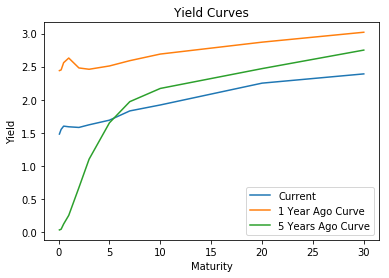

In [19]:
import matplotlib.pyplot as plt
graph_data.plot(kind="line")
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Yield Curves")
plt.show()

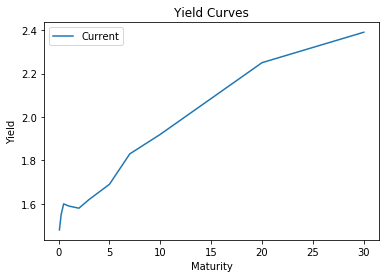

In [20]:
#Let's see what just the current would look like
graph_data[["Current"]].plot(kind="line")
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Yield Curves")
plt.show()

In [21]:
#We might not like that it does not begin at 0 as a reference point
#If we call plt.ylim() before showing a plot we will get back the plot limits

(1.4344999999999999, 2.4355000000000002)


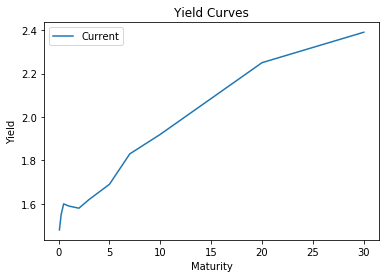

In [22]:
graph_data[["Current"]].plot(kind="line")
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Yield Curves")
print(plt.ylim())
plt.show()

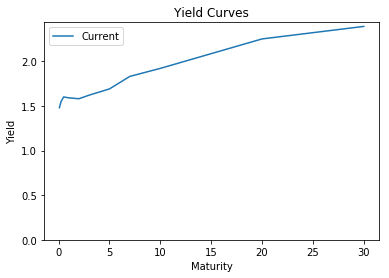

In [23]:
#By passing plt.ylim() a set of limits to use, we can set the boundaries
graph_data[["Current"]].plot(kind="line")
current_lim = plt.ylim()
#Set the new limits so that it is at a minimum 0 as the y limit
new_lim = [min(current_lim[0],0),current_lim[1]]
plt.ylim(new_lim)
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Yield Curves")
plt.show()

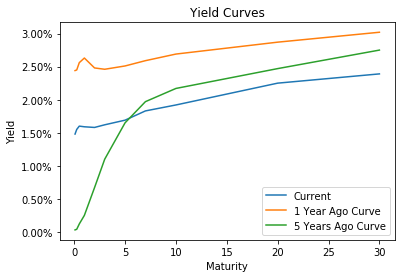

In [24]:
from matplotlib.ticker import PercentFormatter
#When we plot in this way we can return the axis
ax = graph_data.plot(kind="line")
current_lim = plt.ylim()
new_lim = [min(current_lim[0],0),current_lim[1]]
plt.ylim(new_lim)
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Yield Curves")

#We can also set the plot formatter to one that converts numbers to percents
ax.yaxis.set_major_formatter(PercentFormatter())
plt.show()

In [25]:
import os
#Using os, check if a folder exists and if not we can create the folder
if not os.path.exists("Images"):
    os.mkdir("Images")
if not os.path.exists("Tables"):
    os.mkdir("Tables")

In [26]:
#Save the table to a tables folder
yield_table.to_csv("Tables/Treasury Yield Table.csv")

In [27]:
from matplotlib.ticker import PercentFormatter
ax = graph_data.plot(kind="line")
current_lim = plt.ylim()
new_lim = [min(current_lim[0],0),current_lim[1]]
plt.ylim(new_lim)
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Yield Curves")
ax.yaxis.set_major_formatter(PercentFormatter())

#plt.savefig() will save a picture of a graph
plt.savefig("Images/Treasury Yield Curves.png")